# MLP
Mean RCI over 14 cell lines.

This notebook uses
mRNA, canonical, yes middle-exclusion train, yes middle-exclusion test, 0 threshold, learning module, cross-validation.



In [1]:
SEED = 45
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 20:06:03.033488


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Mounted at /content/drive/
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = 0  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = True
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = True
FILTER_TEST         = True
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = True
MIDDLE_LOW          = -1   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         =  1   #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.pc_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.pc_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_pc_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_pc_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 20:06:23.441093
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.pc_RCI.all_cell_lines.csv
Number of RCI values loaded 13663
Num RCI: 13663
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_pc_transcripts.csv
Loaded 13663 sequences.

Training # 1 1
2023-04-29 20:07:16.836386
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2410:2306 51.10%
Computed class weights: {0: 1.0225498699045967, 1: 0.9784232365145228}
Valid 1:0 564:600 48.45%
FIT


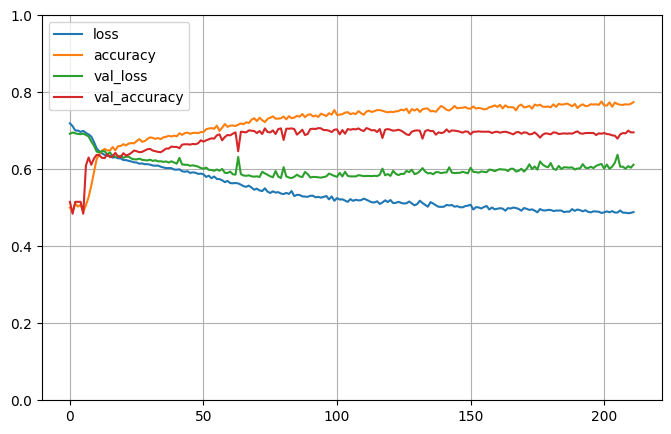


Testing # 1 1
2023-04-29 20:09:57.845214
PREDICT
Test 1:0 564:600 48.45%
Predict 1:0 559:605 48.02%
Test sizes (1164, 1025) (1164,)
Distrib of scores: 0.48439053 mean 0.26925436 std
Range of scores: 0.02332049 to 0.99481696
Score threshold 0.5
Confusion matrix
 [[432 168]
 [173 391]]
Normalized matrix
 [[0.37113402 0.1443299 ]
 [0.14862543 0.33591065]]
Extreme scores correct, pos:neg 295 325
Extreme scores incorrect pos:neg 90 107


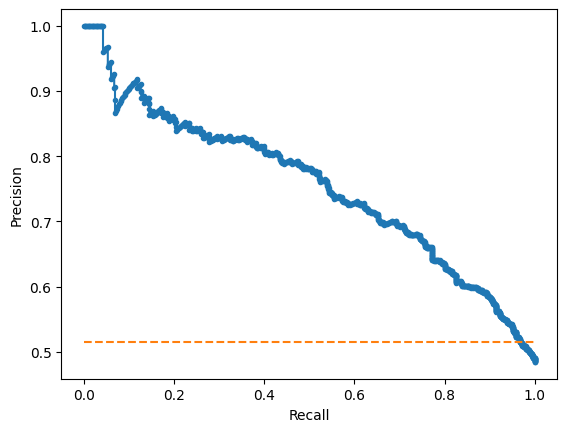

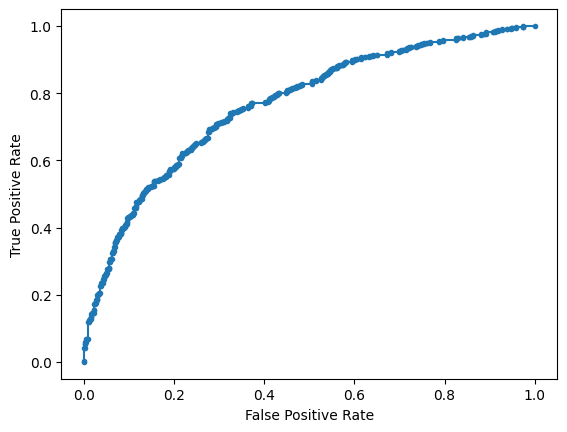

Accuracy: 70.70% Precision: 69.95% Recall: 69.33%
F1: 69.63% MCC: 0.4134
AUPRC: 75.51% AUROC: 76.61%
 accuracy [70.7044673539519]
 precision [69.94633273703042]
 recall [69.32624113475178]
 F1 [69.63490650044524]
 MCC [0.41338764377252]
 AUPRC [75.50977243199462]
 AUROC [76.61495271867612]

Training # 1 2
2023-04-29 20:09:58.601158
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2345:2366 49.78%
Computed class weights: {0: 0.9955621301775148, 1: 1.0044776119402985}
Valid 1:0 629:540 53.81%
FIT


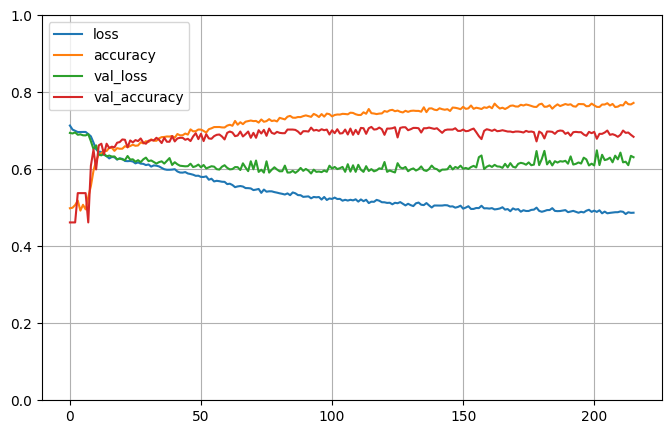


Testing # 1 2
2023-04-29 20:13:22.662341
PREDICT
Test 1:0 629:540 53.81%
Predict 1:0 580:589 49.62%
Test sizes (1169, 1025) (1169,)
Distrib of scores: 0.48273325 mean 0.27473202 std
Range of scores: 0.022605214 to 0.9941314
Score threshold 0.5
Confusion matrix
 [[395 145]
 [194 435]]
Normalized matrix
 [[0.33789564 0.12403764]
 [0.16595381 0.37211292]]
Extreme scores correct, pos:neg 304 312
Extreme scores incorrect pos:neg 77 124


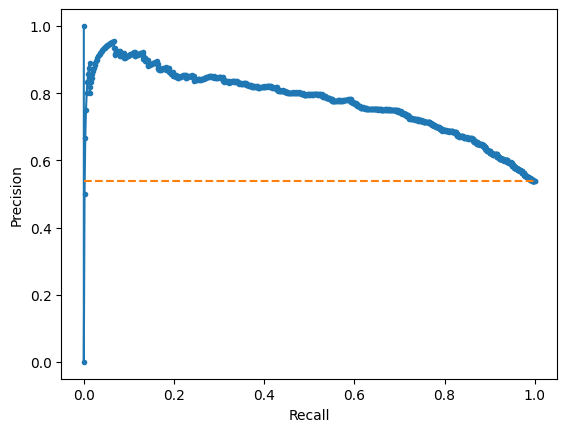

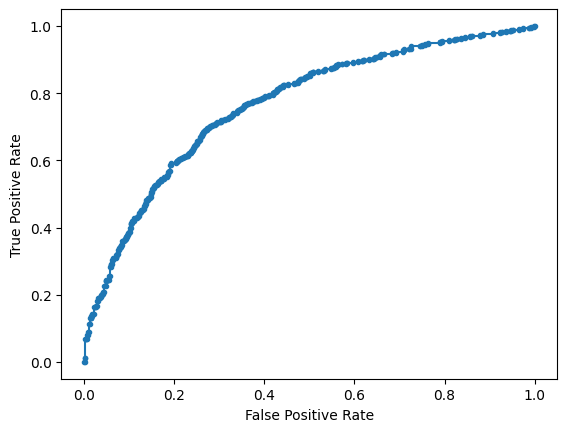

Accuracy: 71.00% Precision: 75.00% Recall: 69.16%
F1: 71.96% MCC: 0.4218
AUPRC: 77.64% AUROC: 76.37%
 accuracy [71.00085543199316]
 precision [75.0]
 recall [69.15739268680446]
 F1 [71.96029776674938]
 MCC [0.42184005010830067]
 AUPRC [77.63668327104243]
 AUROC [76.36607195430724]

Training # 1 3
2023-04-29 20:13:23.597493
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2385:2303 50.87%
Computed class weights: {0: 1.017802865827182, 1: 0.9828092243186582}
Valid 1:0 589:603 49.41%
FIT


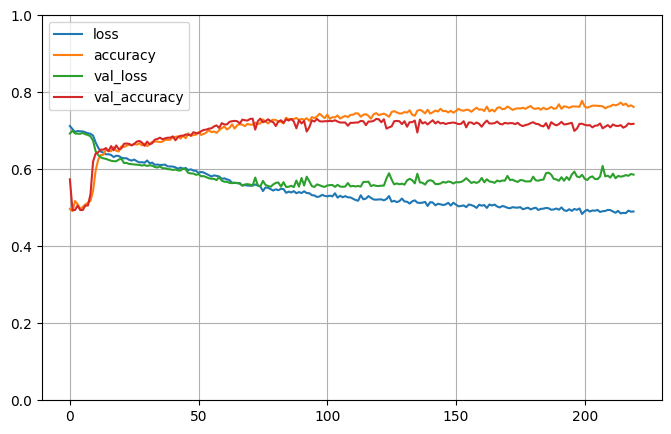


Testing # 1 3
2023-04-29 20:16:24.281042
PREDICT
Test 1:0 589:603 49.41%
Predict 1:0 566:626 47.48%
Test sizes (1192, 1025) (1192,)
Distrib of scores: 0.47639978 mean 0.2681369 std
Range of scores: 0.028715031 to 0.9940365
Score threshold 0.5
Confusion matrix
 [[454 149]
 [172 417]]
Normalized matrix
 [[0.38087248 0.125     ]
 [0.1442953  0.34983221]]
Extreme scores correct, pos:neg 295 363
Extreme scores incorrect pos:neg 76 93


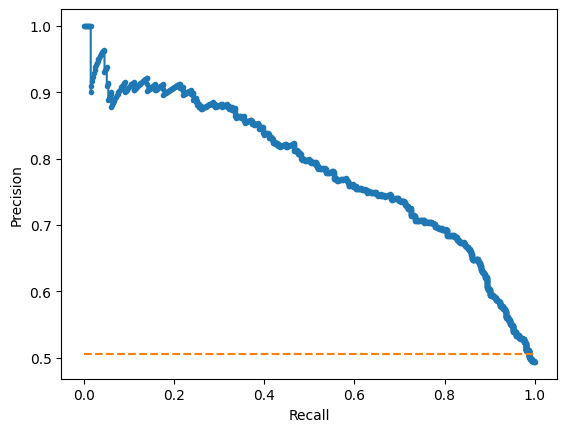

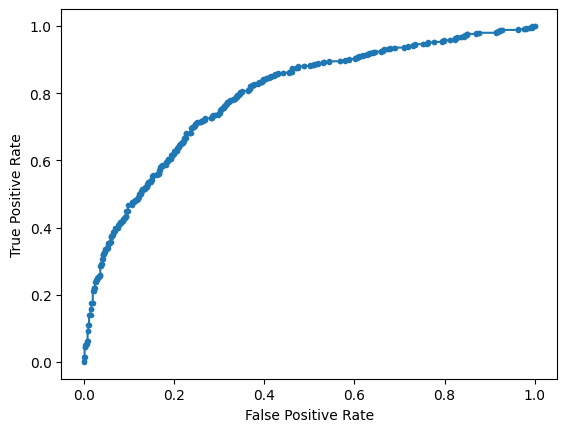

Accuracy: 73.07% Precision: 73.67% Recall: 70.80%
F1: 72.21% MCC: 0.4614
AUPRC: 78.53% AUROC: 79.23%
 accuracy [73.07046979865773]
 precision [73.67491166077738]
 recall [70.79796264855688]
 F1 [72.20779220779221]
 MCC [0.46143492585968693]
 AUPRC [78.53495251307766]
 AUROC [79.22963000503988]

Training # 1 4
2023-04-29 20:16:24.931711
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2401:2309 50.98%
Computed class weights: {0: 1.0199220441749675, 1: 0.9808413161182841}
Valid 1:0 573:597 48.97%
FIT


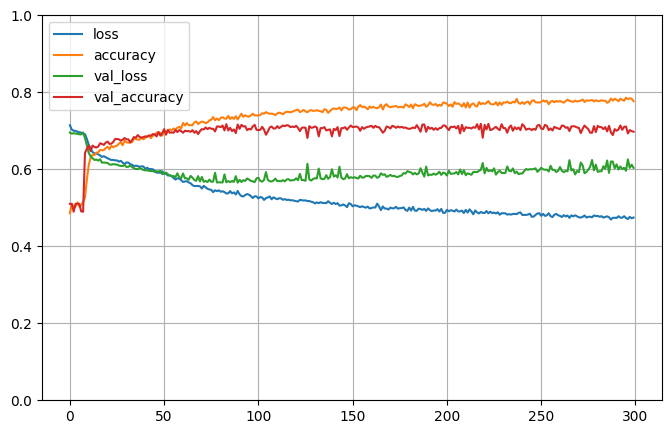


Testing # 1 4
2023-04-29 20:20:23.218497
PREDICT
Test 1:0 573:597 48.97%
Predict 1:0 411:759 35.13%
Test sizes (1170, 1025) (1170,)
Distrib of scores: 0.41490296 mean 0.2799918 std
Range of scores: 0.025226686 to 0.97504056
Score threshold 0.5
Confusion matrix
 [[501  96]
 [258 315]]
Normalized matrix
 [[0.42820513 0.08205128]
 [0.22051282 0.26923077]]
Extreme scores correct, pos:neg 232 430
Extreme scores incorrect pos:neg 55 170


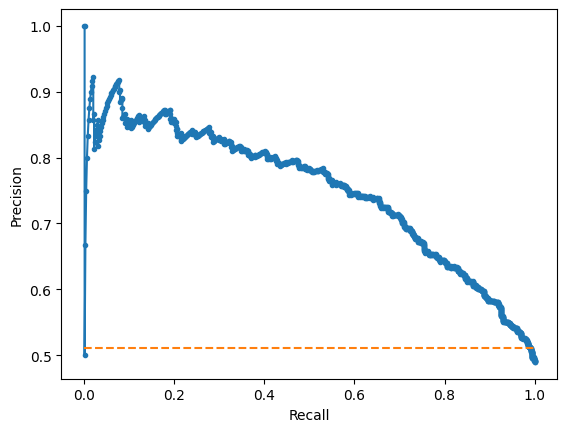

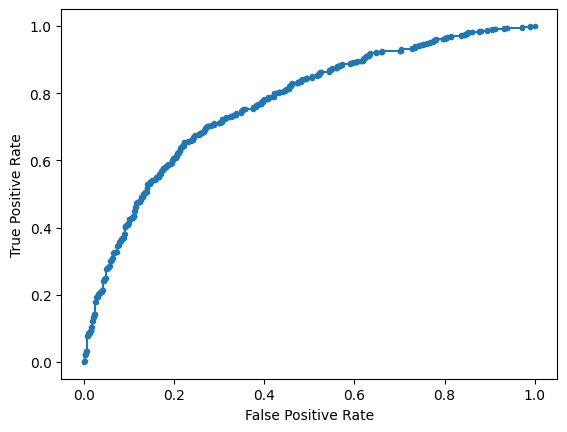

Accuracy: 69.74% Precision: 76.64% Recall: 54.97%
F1: 64.02% MCC: 0.4073
AUPRC: 74.94% AUROC: 77.02%
 accuracy [69.74358974358974]
 precision [76.64233576642336]
 recall [54.973821989528794]
 F1 [64.02439024390245]
 MCC [0.4072853706843511]
 AUPRC [74.93540462027151]
 AUROC [77.01889318611674]

Training # 1 5
2023-04-29 20:20:23.860320
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2355:2340 50.16%
Computed class weights: {0: 1.0032051282051282, 1: 0.9968152866242038}
Valid 1:0 619:566 52.24%
FIT


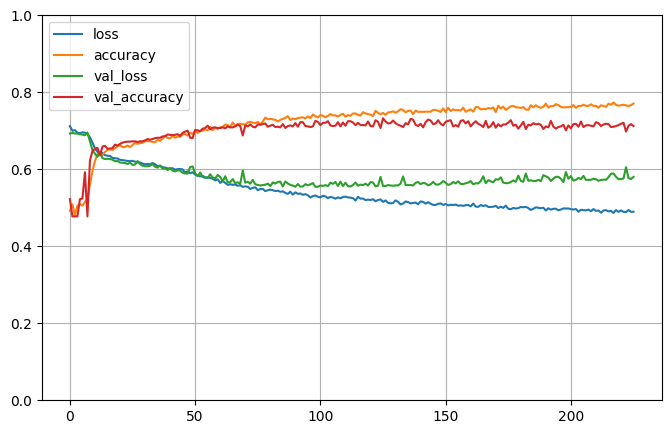


Testing # 1 5
2023-04-29 20:23:47.483071
PREDICT
Test 1:0 619:566 52.24%
Predict 1:0 640:545 54.01%
Test sizes (1185, 1025) (1185,)
Distrib of scores: 0.52032334 mean 0.27415946 std
Range of scores: 0.022384072 to 0.9945751
Score threshold 0.5
Confusion matrix
 [[397 169]
 [148 471]]
Normalized matrix
 [[0.3350211  0.14261603]
 [0.12489451 0.39746835]]
Extreme scores correct, pos:neg 363 293
Extreme scores incorrect pos:neg 92 90


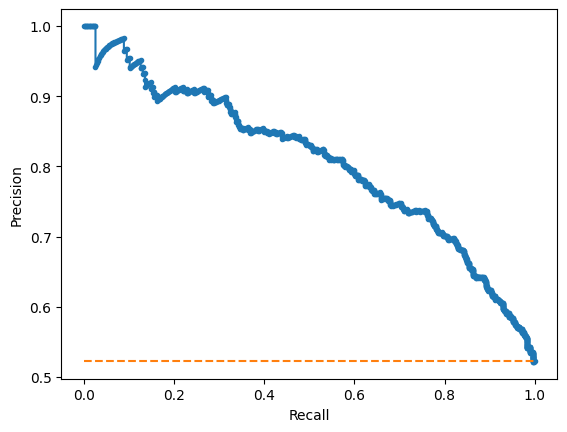

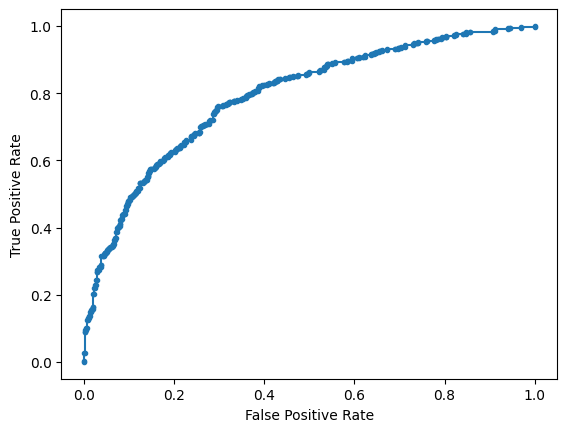

Accuracy: 73.25% Precision: 73.59% Recall: 76.09%
F1: 74.82% MCC: 0.4633
AUPRC: 80.60% AUROC: 79.06%
 accuracy [73.24894514767932]
 precision [73.59375]
 recall [76.09046849757674]
 F1 [74.82128673550437]
 MCC [0.46334684520664915]
 AUPRC [80.59857572203167]
 AUROC [79.05689673872712]

Training # 2 1
2023-04-29 20:23:48.135696
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2378:2331 50.50%
Computed class weights: {0: 1.0100815100815101, 1: 0.9901177460050462}
Valid 1:0 596:575 50.90%
FIT


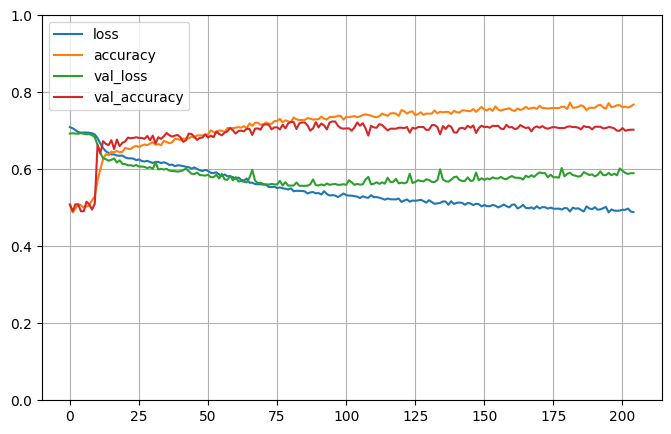


Testing # 2 1
2023-04-29 20:27:11.723085
PREDICT
Test 1:0 596:575 50.90%
Predict 1:0 642:529 54.82%
Test sizes (1171, 1025) (1171,)
Distrib of scores: 0.53008026 mean 0.27106643 std
Range of scores: 0.02747598 to 0.9937641
Score threshold 0.5
Confusion matrix
 [[389 186]
 [140 456]]
Normalized matrix
 [[0.33219471 0.1588386 ]
 [0.11955594 0.38941076]]
Extreme scores correct, pos:neg 357 296
Extreme scores incorrect pos:neg 107 73


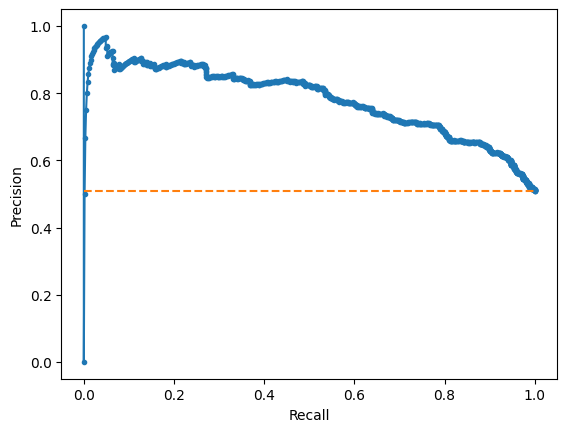

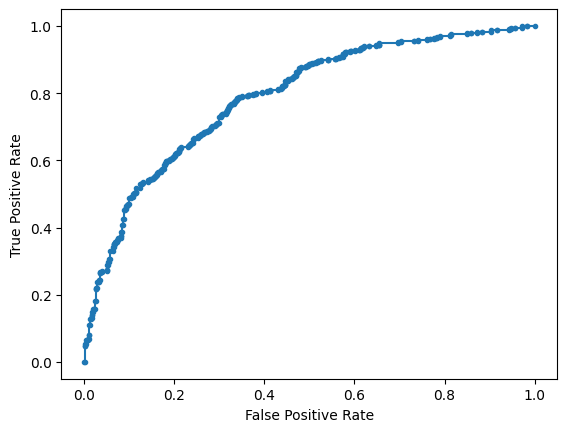

Accuracy: 72.16% Precision: 71.03% Recall: 76.51%
F1: 73.67% MCC: 0.4436
AUPRC: 78.01% AUROC: 78.80%
 accuracy [72.16054654141759]
 precision [71.02803738317756]
 recall [76.51006711409396]
 F1 [73.66720516962843]
 MCC [0.4436217246235542]
 AUPRC [78.01330805223394]
 AUROC [78.79865771812081]

Training # 2 2
2023-04-29 20:27:12.437657
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2382:2300 50.88%
Computed class weights: {0: 1.0178260869565217, 1: 0.9827875734676742}
Valid 1:0 592:606 49.42%
FIT


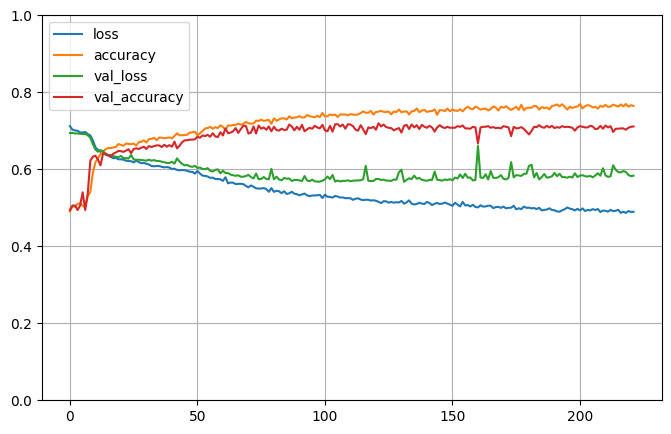


Testing # 2 2
2023-04-29 20:30:06.808455
PREDICT
Test 1:0 592:606 49.42%
Predict 1:0 536:662 44.74%
Test sizes (1198, 1025) (1198,)
Distrib of scores: 0.4540811 mean 0.27621448 std
Range of scores: 0.0121802585 to 0.99307424
Score threshold 0.5
Confusion matrix
 [[466 140]
 [196 396]]
Normalized matrix
 [[0.38898164 0.11686144]
 [0.16360601 0.33055092]]
Extreme scores correct, pos:neg 286 360
Extreme scores incorrect pos:neg 63 114


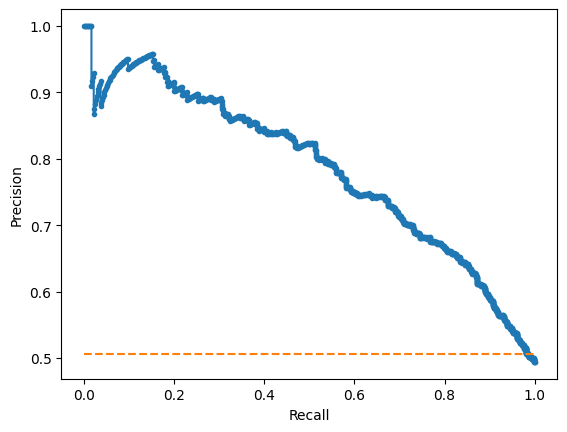

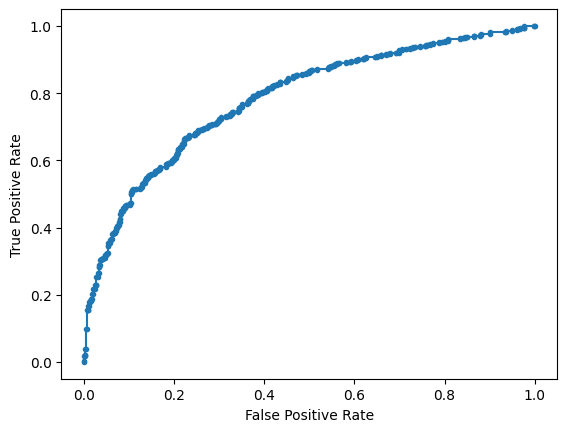

Accuracy: 71.95% Precision: 73.88% Recall: 66.89%
F1: 70.21% MCC: 0.4403
AUPRC: 78.46% AUROC: 78.29%
 accuracy [71.95325542570951]
 precision [73.88059701492537]
 recall [66.8918918918919]
 F1 [70.2127659574468]
 MCC [0.44030799577527024]
 AUPRC [78.46304099897712]
 AUROC [78.2858353402908]

Training # 2 3
2023-04-29 20:30:07.826532
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2384:2352 50.34%
Computed class weights: {0: 1.0068027210884354, 1: 0.9932885906040269}
Valid 1:0 590:554 51.57%
FIT


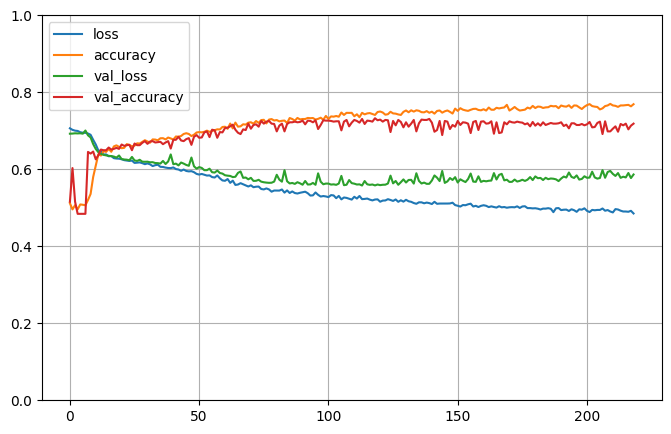


Testing # 2 3
2023-04-29 20:33:01.447431
PREDICT
Test 1:0 590:554 51.57%
Predict 1:0 592:552 51.75%
Test sizes (1144, 1025) (1144,)
Distrib of scores: 0.5109053 mean 0.2614558 std
Range of scores: 0.024241352 to 0.99069566
Score threshold 0.5
Confusion matrix
 [[400 154]
 [152 438]]
Normalized matrix
 [[0.34965035 0.13461538]
 [0.13286713 0.38286713]]
Extreme scores correct, pos:neg 326 288
Extreme scores incorrect pos:neg 83 81


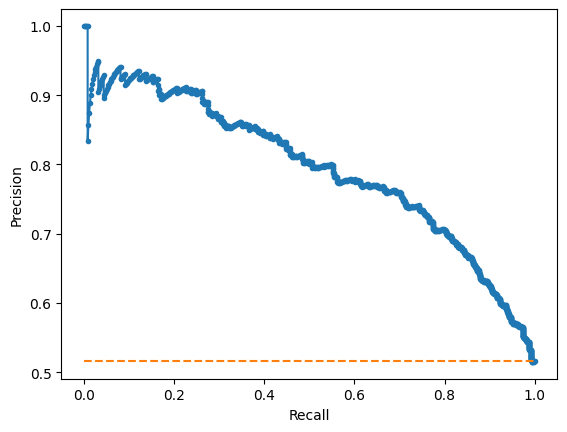

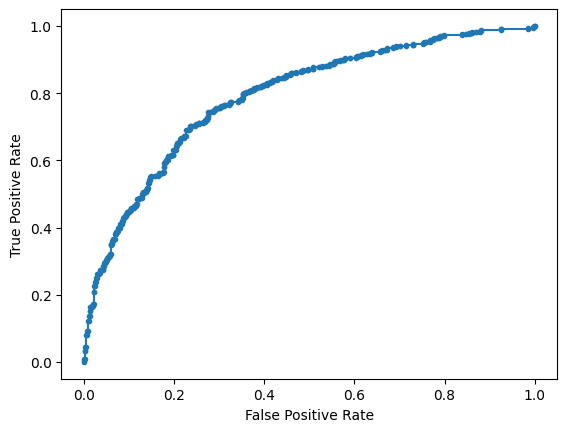

Accuracy: 73.25% Precision: 73.99% Recall: 74.24%
F1: 74.11% MCC: 0.4644
AUPRC: 79.45% AUROC: 79.04%
 accuracy [73.25174825174825]
 precision [73.98648648648648]
 recall [74.23728813559322]
 F1 [74.11167512690355]
 MCC [0.4644485408755781]
 AUPRC [79.44677000625072]
 AUROC [79.043321299639]

Training # 2 4
2023-04-29 20:33:02.115191
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2368:2310 50.62%
Computed class weights: {0: 1.0125541125541127, 1: 0.9877533783783784}
Valid 1:0 606:596 50.42%
FIT


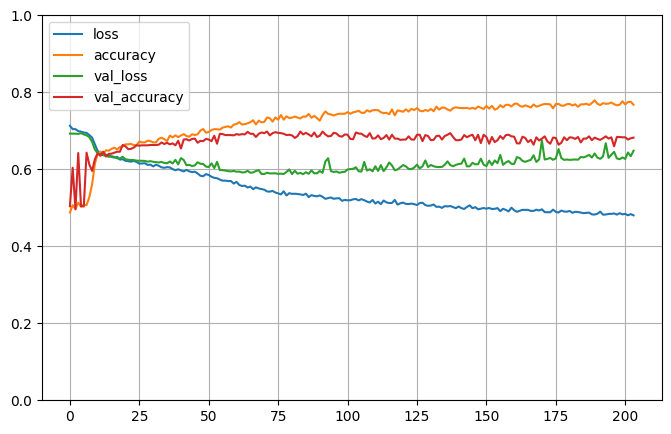


Testing # 2 4
2023-04-29 20:36:25.817012
PREDICT
Test 1:0 606:596 50.42%
Predict 1:0 510:692 42.43%
Test sizes (1202, 1025) (1202,)
Distrib of scores: 0.43416318 mean 0.26447815 std
Range of scores: 0.022227801 to 0.98355263
Score threshold 0.5
Confusion matrix
 [[461 135]
 [231 375]]
Normalized matrix
 [[0.38352745 0.11231281]
 [0.1921797  0.31198003]]
Extreme scores correct, pos:neg 247 373
Extreme scores incorrect pos:neg 61 152


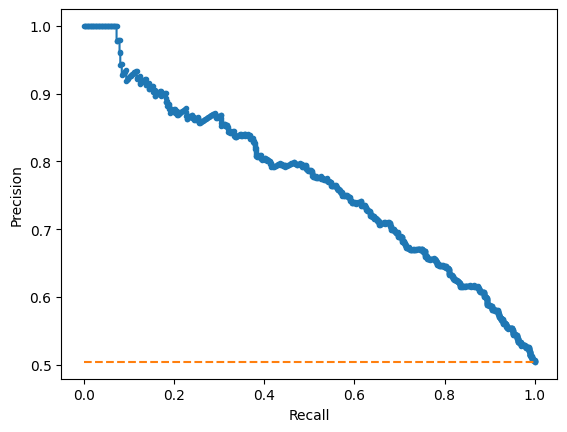

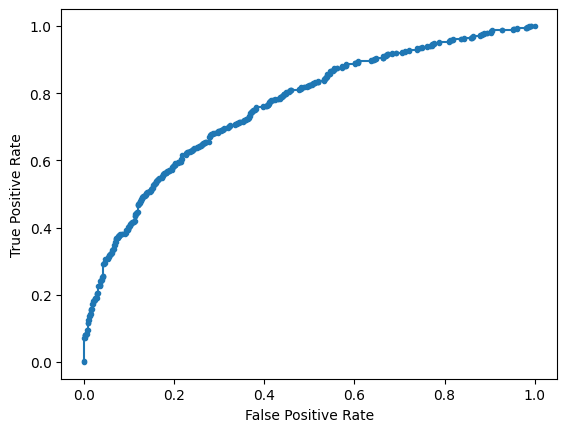

Accuracy: 69.55% Precision: 73.53% Recall: 61.88%
F1: 67.20% MCC: 0.3969
AUPRC: 77.02% AUROC: 75.95%
 accuracy [69.55074875207987]
 precision [73.52941176470588]
 recall [61.88118811881188]
 F1 [67.20430107526882]
 MCC [0.3968639248250933]
 AUPRC [77.01679741190475]
 AUROC [75.95493609763662]

Training # 2 5
2023-04-29 20:36:26.445814
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 2384:2331 50.56%
Computed class weights: {0: 1.0113685113685114, 1: 0.9888842281879194}
Valid 1:0 590:575 50.64%
FIT


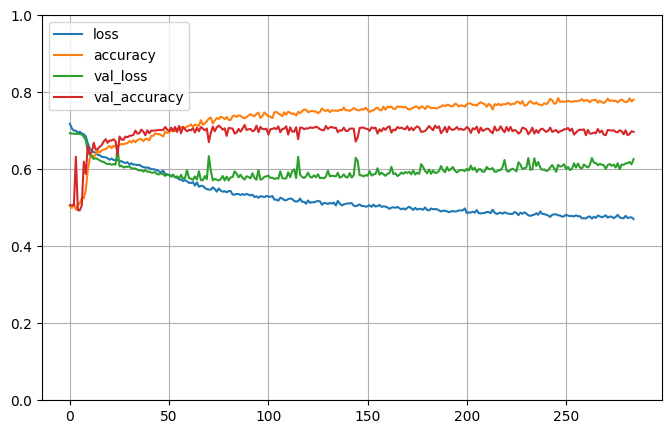


Testing # 2 5
2023-04-29 20:40:49.998472
PREDICT
Test 1:0 590:575 50.64%
Predict 1:0 536:629 46.01%
Test sizes (1165, 1025) (1165,)
Distrib of scores: 0.4781555 mean 0.2836572 std
Range of scores: 0.017274125 to 0.98639333
Score threshold 0.5
Confusion matrix
 [[435 140]
 [194 396]]
Normalized matrix
 [[0.37339056 0.12017167]
 [0.16652361 0.33991416]]
Extreme scores correct, pos:neg 294 341
Extreme scores incorrect pos:neg 79 121


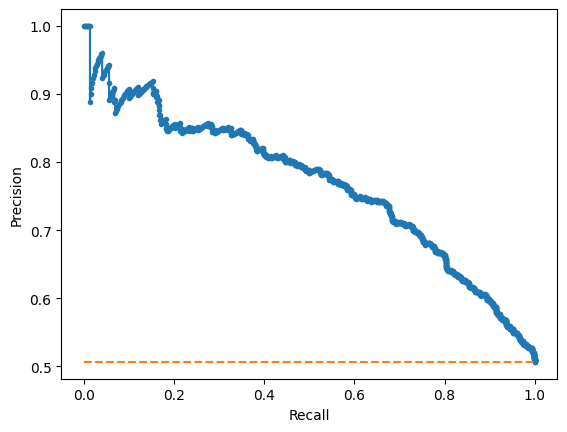

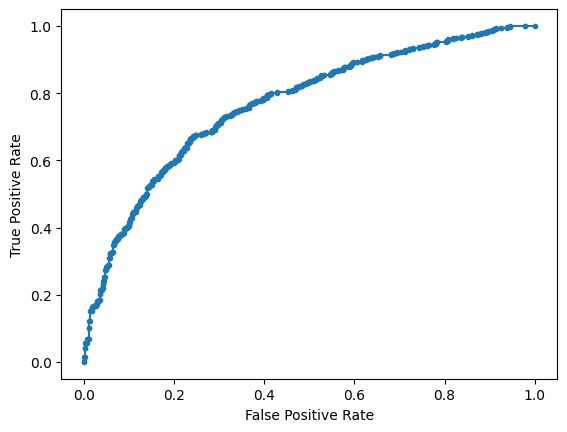

Accuracy: 71.33% Precision: 73.88% Recall: 67.12%
F1: 70.34% MCC: 0.4290
AUPRC: 76.80% AUROC: 76.71%
 accuracy [71.3304721030043]
 precision [73.88059701492537]
 recall [67.11864406779661]
 F1 [70.33747779751333]
 MCC [0.4290419587632376]
 AUPRC [76.79902942847963]
 AUROC [76.71451731761236]
2023-04-29 20:40:50.739257


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator('pc')  # use pc filename prefix for mRNA
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 71.60% std 1.37
 precision mean 73.52% std 1.87
 recall mean 68.70% std 6.60
 F1 mean 70.82% std 3.32
 MCC mean 0.4342 std 0.0244
 AUPRC mean 77.70% std 1.72
 AUROC mean 77.71% std 1.29
 accuracy [[70.7044673539519], [71.00085543199316], [73.07046979865773], [69.74358974358974], [73.24894514767932], [72.16054654141759], [71.95325542570951], [73.25174825174825], [69.55074875207987], [71.3304721030043]]
 precision [[69.94633273703042], [75.0], [73.67491166077738], [76.64233576642336], [73.59375], [71.02803738317756], [73.88059701492537], [73.98648648648648], [73.52941176470588], [73.88059701492537]]
 recall [[69.32624113475178], [69.15739268680446], [70.79796264855688], [54.973821989528794], [76.09046849757674], [76.51006711409396], [66.8918918918919], [74.23728813559322], [61.88118811881188], [67.11864406779661]]
 F1 [[69.63490650044524], [71.96029776674938], [72.20779220779221], [64.02439024390245], [74.82128673550437], [73.66720516962843], [70.2127659574468], [74.111675